In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.zeros((240,320,2), dtype="float32")
p[:,:,0], p[:,:,1] = np.meshgrid(np.linspace(-1,1,p.shape[1]), np.linspace(1,-1,p.shape[0]), sparse=True)
p[:,:,0] *= p.shape[1] / p.shape[0]

In [ ]:
#p = np.zeros((240,320,3), dtype="float32")
#p[:,:,0], p[:,:,1] = np.meshgrid(np.linspace(-1,1,p.shape[1]), np.linspace(1,-1,p.shape[0]), sparse=True)
#p[:,:,0] *= p.shape[1] / p.shape[0]
#p[:,:,2] = 2.5
#print(p)

In [ ]:
z = np.zeros((240,320), dtype="float32")
z[:] = 2.5
pp = np.dstack((p,z))
#print(pp)

In [ ]:
z = np.zeros((240,320,1), dtype="float32")
z[:] = 2.5
pp = np.c_[p,z]
print(pp)

In [ ]:
a = np.zeros((2,2))
b = np.ones((2,1))
c = np.c_[a,b]
print(c)

In [ ]:
e = np.array([0.5,2.7,1.2,0.2,1.0,2.3,1.0,0.7,1.4])
e = e.reshape(3,3)
print(e)

In [ ]:
res = pp.dot(e)
print(res.shape)
print(res)

In [ ]:
def normalize(v):
    return v / np.linalg.norm(v)    

In [ ]:
def scene(pos):
    d = pos[1] + 0.5
    d = np.minimum(d, np.linalg.norm(pos) -0.5)
    return d

In [ ]:
def calcNormal(pos):
    e = 0.001
    return normalize(
        np.array([
            scene(pos+[e,0,0]) - scene(pos-[e,0,0]),
            scene(pos+[0,e,0]) - scene(pos-[0,e,0]),
            scene(pos+[0,0,e]) - scene(pos-[0,0,e])
        ])
    )

In [ ]:
def reflect(v, nor):
    return v - 2 * np.dot(v, nor) * nor

In [ ]:
def trace(rd, ro):
    precis = 0.01
    t = 0.0
    h = precis * 2
    col = 0.0
    for i in range(60):
        if h < precis or t > 20.0:
            continue
        h = scene(ro + rd * t)
        t += h
    if h < precis:
        pos = ro + rd * t
        nor = calcNormal(pos)
        lig = normalize(np.array([1,2,1]))
        dif = np.clip(np.dot(nor, lig), 0.0, 1.0)
        spe = np.clip(np.dot(normalize(reflect(rd, nor)), lig), 0.0, 1.0)**32
        col = np.clip(dif + spe, 0.0, 1.0)
    return col

In [ ]:
ro = np.array([0,2,3])
ta = np.array([0,0,0])
cw = normalize(ta-ro)
cup = np.array([0,1,0])

In [ ]:
cu = normalize(np.cross(cw, cup))
cv = normalize(np.cross(cu, cw))
#rd = np.zeros((p.shape[0], p.shape[1], 3), dtype="float32")
#rd = p[:,:,0,np.newaxis]*cu + p[:,:,1,np.newaxis]*cv + 2.5*cw
#rd = np.apply_along_axis(normalize, 2, rd)
cs = np.c_[cu,cv,cw]
rd = pp.dot(cs)
d = np.linalg.norm(rd, axis=2, keepdims=True)
rd /= d

In [ ]:
cols = np.apply_along_axis(trace, 2, rd, ro)

In [ ]:
plt.imshow(cols, cmap="gray")
plt.show()

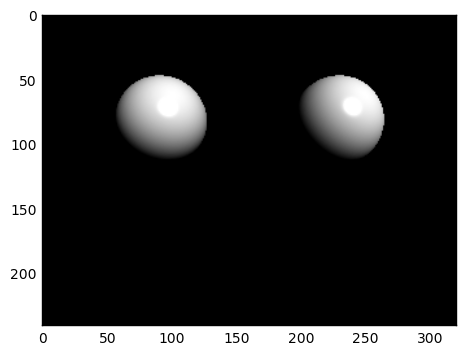

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = np.zeros((240,320,2), dtype="float32")
p[:,:,0], p[:,:,1] = np.meshgrid(np.linspace(-1,1,p.shape[1]), np.linspace(1,-1,p.shape[0]), sparse=True)
p[:,:,0] *= p.shape[1] / p.shape[0]

z = np.zeros((240,320), dtype="float32")
z[:] = 2.5
pp = np.dstack((p,z))

def normalize(v):
    return v / np.linalg.norm(v)    

def scene(pos):
    d1 = np.linalg.norm(pos+np.array([-1,0,1])) - 0.5
    d2 = np.linalg.norm(pos+np.array([1,0,1])) - 0.5
    d = np.minimum(d1,d2)
    return d

def calcNormal(pos):
    e = 0.001
    return normalize(
        np.array([
            scene(pos+[e,0,0]) - scene(pos-[e,0,0]),
            scene(pos+[0,e,0]) - scene(pos-[0,e,0]),
            scene(pos+[0,0,e]) - scene(pos-[0,0,e])
        ])
    )

def reflect(v, nor):
    return v - 2 * np.dot(v, nor) * nor

def trace(rd, ro):
    precis = 0.01
    t = 0.0
    h = precis * 2
    col = 0.0
    for i in range(60):
        if h < precis or t > 20.0:
            continue
        h = scene(ro + rd * t)
        t += h
    if h < precis:
        pos = ro + rd * t
        nor = calcNormal(pos)
        lig = normalize(np.array([1,2,1]))
        dif = np.clip(np.dot(nor, lig), 0.0, 1.0)
        spe = np.clip(np.dot(normalize(reflect(rd, nor)), lig), 0.0, 1.0)**32
        col = np.clip(dif + spe, 0.0, 1.0)
    return col

ro = np.array([0,2,3])
ta = np.array([0,0,0])
cw = normalize(ta-ro)
cup = np.array([0,1,0])
cu = normalize(np.cross(cw, cup))
cv = normalize(np.cross(cu, cw))
cs = np.c_[cu,cv,cw]
rd = pp.dot(cs)
d = np.linalg.norm(rd, axis=2, keepdims=True)
rd /= d

cols = np.apply_along_axis(trace, 2, rd, ro)

plt.imshow(cols, cmap="gray")
plt.show()